<h1 style="font-size:36px; color:orange">📊 Smart Living : Optimising lifestyle through ML</h1>

<h1 style="font-size:24px; color:#dc143c">📁📦Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score, accuracy_score
import pickle


In [2]:
df = pd.read_csv('sleep_cycle_productivity.csv')

In [3]:
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [4]:
df.shape

(5000, 15)

<h1 style="font-size:24px; color:#dc143c">📈Data Visualization

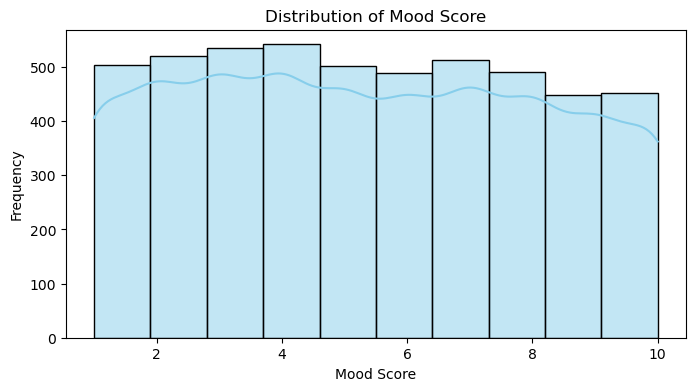

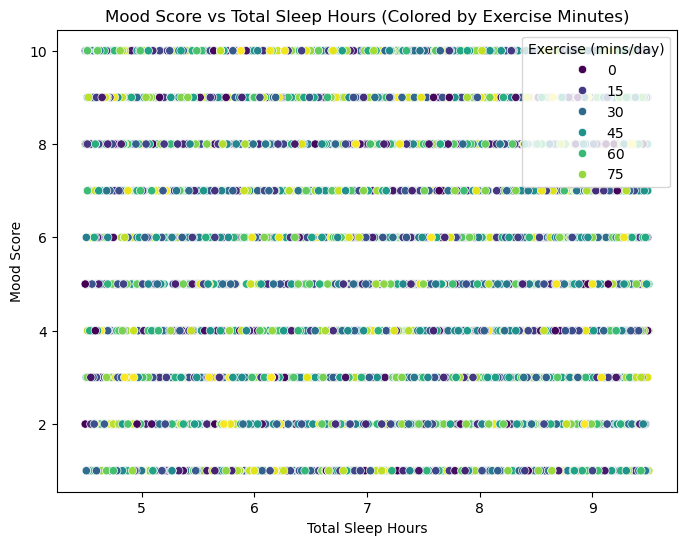

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Mood Score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Mood Score')
plt.xlabel('Mood Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Sleep Hours', y='Mood Score', hue='Exercise (mins/day)', palette='viridis')
plt.title('Mood Score vs Total Sleep Hours (Colored by Exercise Minutes)')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Mood Score')
plt.show()


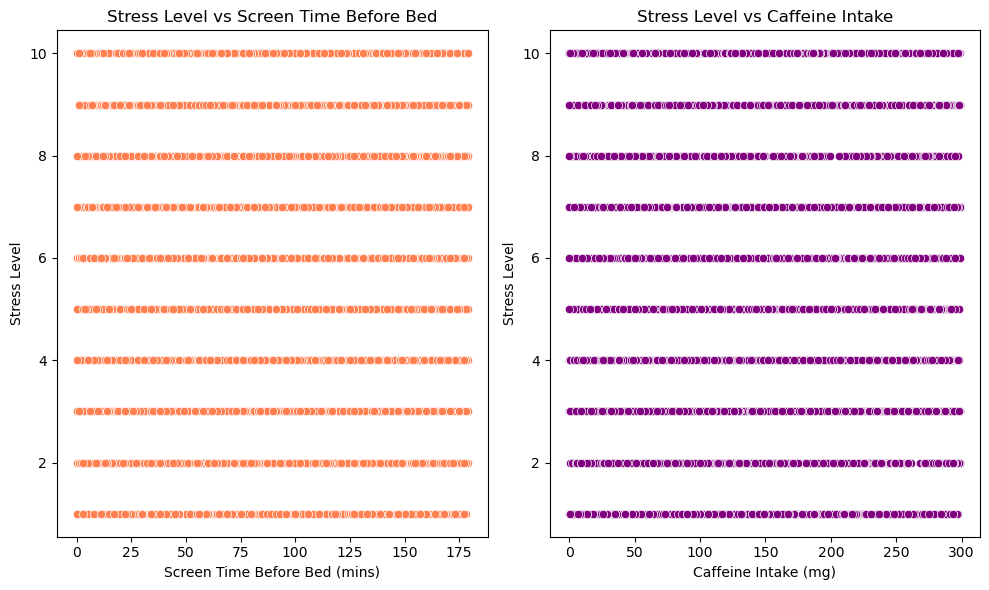

In [6]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Screen Time Before Bed (mins)', y='Stress Level', color='coral')
plt.title('Stress Level vs Screen Time Before Bed')
plt.xlabel('Screen Time Before Bed (mins)')
plt.ylabel('Stress Level')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Caffeine Intake (mg)', y='Stress Level', color='purple')
plt.title('Stress Level vs Caffeine Intake')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Stress Level')

plt.tight_layout()
plt.show()


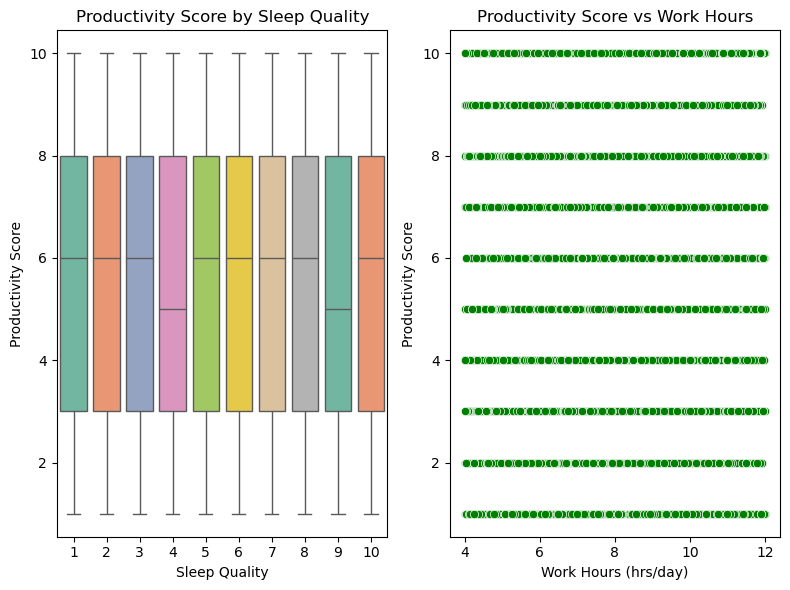

In [7]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Sleep Quality', y='Productivity Score', 
            hue='Sleep Quality', palette='Set2', dodge=False, legend=False)
plt.title('Productivity Score by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Productivity Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Work Hours (hrs/day)', y='Productivity Score', color='green')
plt.title('Productivity Score vs Work Hours')
plt.xlabel('Work Hours (hrs/day)')
plt.ylabel('Productivity Score')

plt.tight_layout()
plt.show()


<h1 style="font-size:24px; color:#dc143c">🧹🧼Data Preprocessing

In [8]:
df.describe()

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [9]:
df.isnull().sum()

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [11]:
df.dtypes

Date                              object
Person_ID                          int64
Age                                int64
Gender                            object
Sleep Start Time                 float64
Sleep End Time                   float64
Total Sleep Hours                float64
Sleep Quality                      int64
Exercise (mins/day)                int64
Caffeine Intake (mg)               int64
Screen Time Before Bed (mins)      int64
Work Hours (hrs/day)             float64
Productivity Score                 int64
Mood Score                         int64
Stress Level                       int64
dtype: object

In [12]:
df.drop(columns=[
    'Date',
    'Person_ID',
    'Sleep Start Time',
    'Sleep End Time',
], inplace=True)

df.dtypes

Age                                int64
Gender                            object
Total Sleep Hours                float64
Sleep Quality                      int64
Exercise (mins/day)                int64
Caffeine Intake (mg)               int64
Screen Time Before Bed (mins)      int64
Work Hours (hrs/day)             float64
Productivity Score                 int64
Mood Score                         int64
Stress Level                       int64
dtype: object

In [13]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

<h1 style="font-size:24px; color:#dc143c">⚖️Train Test Split

In [14]:

X = df.drop(columns=['Productivity Score' , 'Mood Score' , 'Stress Level'])
y = df[['Productivity Score','Mood Score' , 'Stress Level']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1 style="font-size:24px; color:#dc143c">🛠️Model Building

In [15]:
base_regressor = RandomForestRegressor(random_state=42)

model = MultiOutputRegressor(base_regressor)

model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [16]:
y_pred = model.predict(X_test)

y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)
y_test_df = y_test.reset_index(drop=True)


for col in y_test_df.columns:
    mae = mean_absolute_error(y_test_df[col], y_pred_df[col])
    mse = mean_squared_error(y_test_df[col], y_pred_df[col])
    r2 = r2_score(y_test_df[col], y_pred_df[col])
    print(f"Evaluation metrics for {col}:")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R2:  {r2:.3f}")


Evaluation metrics for Productivity Score:
  MAE: 2.501
  MSE: 8.331
  R2:  -0.030
Evaluation metrics for Mood Score:
  MAE: 2.490
  MSE: 8.303
  R2:  -0.021
Evaluation metrics for Stress Level:
  MAE: 2.568
  MSE: 8.833
  R2:  -0.052


In [17]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import r2_score
print("R2 scores with Linear Regression:")
for i, col in enumerate(y_test.columns):
    print(f"{col}: {r2_score(y_test[col], y_pred_lr[:, i]):.3f}")


R2 scores with Linear Regression:
Productivity Score: 0.002
Mood Score: -0.003
Stress Level: -0.002


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


ridge_model = MultiOutputRegressor(Ridge(alpha=1.0, random_state=42))
ridge_model.fit(X_train_scaled, y_train)

# 3. Evaluate
y_pred = ridge_model.predict(X_test_scaled)


In [19]:
for i, col in enumerate(y_test.columns):
    mae = mean_absolute_error(y_test[col], y_pred[:, i])
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"Evaluation for {col} with Ridge (scaled):")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R²:  {r2:.3f}\n")

Evaluation for Productivity Score with Ridge (scaled):
  MAE: 2.484
  MSE: 8.068
  R²:  0.002

Evaluation for Mood Score with Ridge (scaled):
  MAE: 2.480
  MSE: 8.154
  R²:  -0.003

Evaluation for Stress Level with Ridge (scaled):
  MAE: 2.529
  MSE: 8.416
  R²:  -0.002



In [20]:
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)


print("First 10 values of y_test:\n", y_test_array[:10])
print("First 10 values of y_pred:\n", y_pred_array[:10])

First 10 values of y_test:
 [[ 1  5  6]
 [ 6  5  8]
 [ 3  2  1]
 [ 5  1  3]
 [ 6  7  3]
 [ 6  3  1]
 [ 3  1  9]
 [ 8  6 10]
 [ 7  1  6]
 [ 4  4 10]]
First 10 values of y_pred:
 [[5.65437562 5.18960152 5.48031876]
 [5.52173673 5.38174154 5.59760321]
 [5.63935509 5.30124848 5.54341284]
 [5.52992001 5.38276555 5.54137515]
 [5.67497975 5.39013654 5.47829731]
 [5.55214971 5.42459634 5.50550309]
 [5.67015275 5.52769961 5.60714504]
 [5.65260953 5.30201971 5.71118516]
 [5.60472349 5.42553865 5.55235972]
 [5.58507824 5.37638738 5.65983743]]


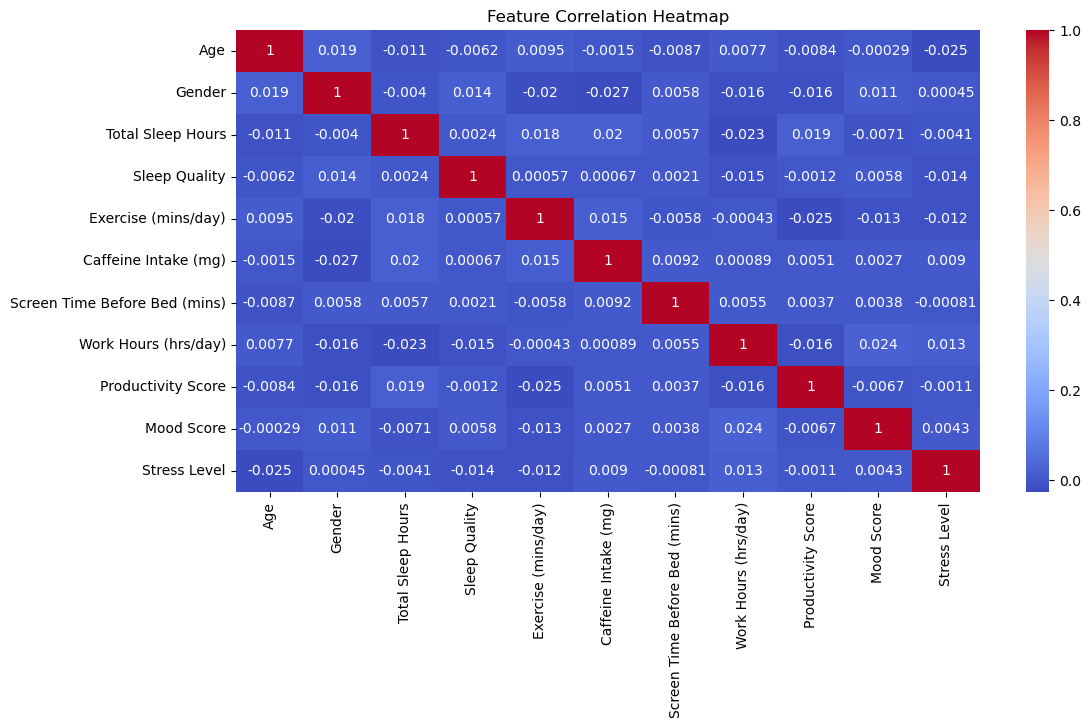

In [21]:
corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


<h1 style="font-size:24px; color:#dc143c">🎯Model Optimization

In [22]:
raw_mood = (
    40 + 0.3 * df["Sleep Quality"]
    + 0.1 * df["Exercise (mins/day)"]
    - 0.05 * df["Caffeine Intake (mg)"]
    - 0.2 * df["Screen Time Before Bed (mins)"]
    - 0.1 * df["Work Hours (hrs/day)"]
    + np.random.normal(0, 5, len(df))
)
df["Mood Score"] = 1 + 9 * (raw_mood - raw_mood.min()) / (raw_mood.max() - raw_mood.min())


In [23]:
raw_stress = (
    70 - 0.2 * df["Sleep Quality"]
    - 0.1 * df["Exercise (mins/day)"]
    + 0.05 * df["Caffeine Intake (mg)"]
    + 0.3 * df["Screen Time Before Bed (mins)"]
    + 0.5 * df["Work Hours (hrs/day)"]
    - 0.2 * df["Mood Score"]
    + np.random.normal(0, 5, len(df))
)
df["Stress Level"] = 1 + 9 * (raw_stress - raw_stress.min()) / (raw_stress.max() - raw_stress.min())

In [24]:
raw_productivity = (
    50 + 0.4 * df["Sleep Quality"]
    - 1.2 * df["Stress Level"]
    + 2.5 * df["Mood Score"]
    + 0.1 * df["Exercise (mins/day)"]
    - 0.8 * df["Work Hours (hrs/day)"]
    + np.random.normal(0, 3, len(df))  # Reduced noise
)
df["Productivity Score"] = 1 + 9 * (raw_productivity - raw_productivity.min()) / (raw_productivity.max() - raw_productivity.min())


<h1 style="font-size:16px; color:#dc143c">Data Visualization after Model Optimizing

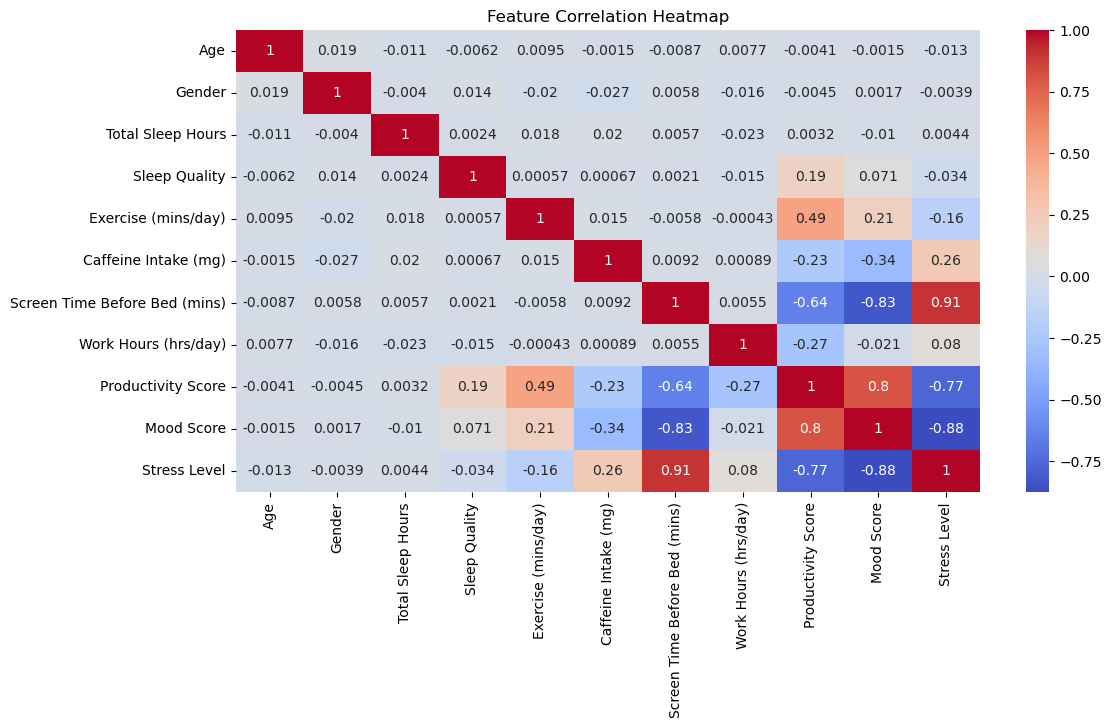

In [25]:
corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

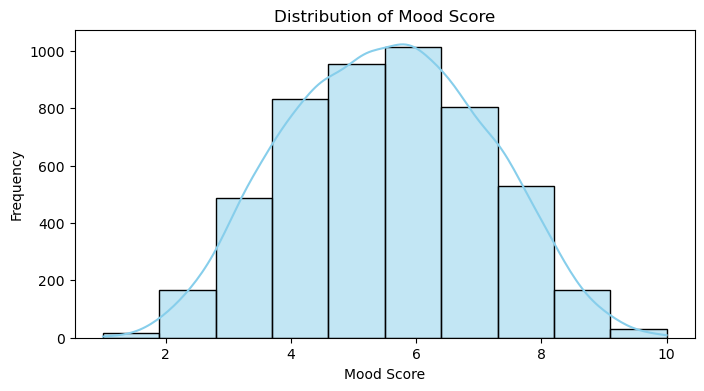

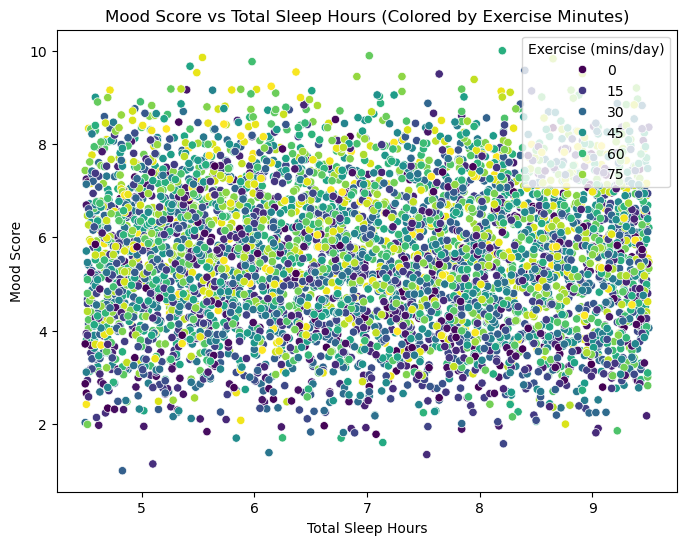

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Mood Score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Mood Score')
plt.xlabel('Mood Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Sleep Hours', y='Mood Score', hue='Exercise (mins/day)', palette='viridis')
plt.title('Mood Score vs Total Sleep Hours (Colored by Exercise Minutes)')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Mood Score')
plt.show()


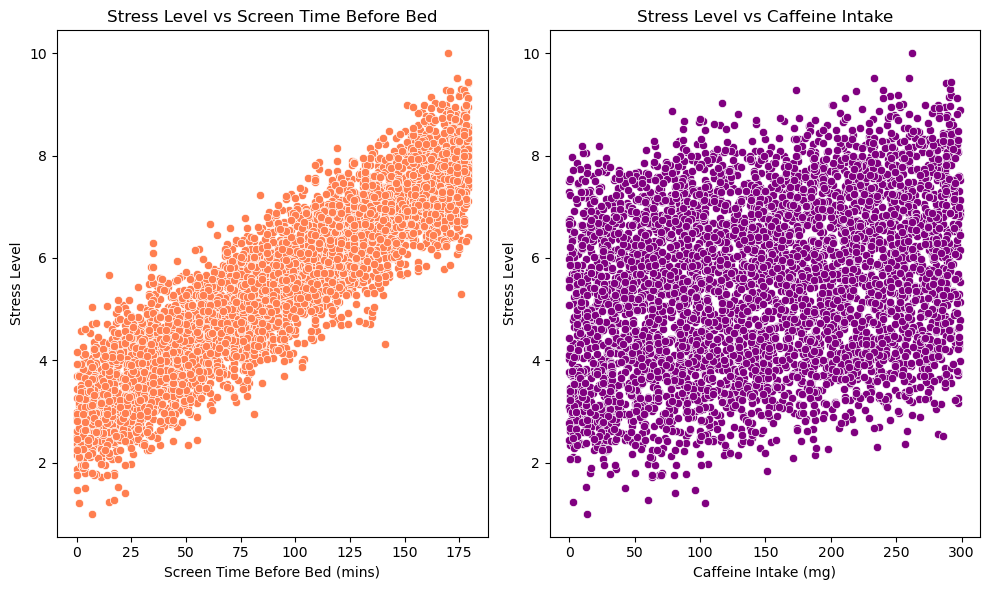

In [27]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Screen Time Before Bed (mins)', y='Stress Level', color='coral')
plt.title('Stress Level vs Screen Time Before Bed')
plt.xlabel('Screen Time Before Bed (mins)')
plt.ylabel('Stress Level')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Caffeine Intake (mg)', y='Stress Level', color='purple')
plt.title('Stress Level vs Caffeine Intake')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Stress Level')

plt.tight_layout()
plt.show()

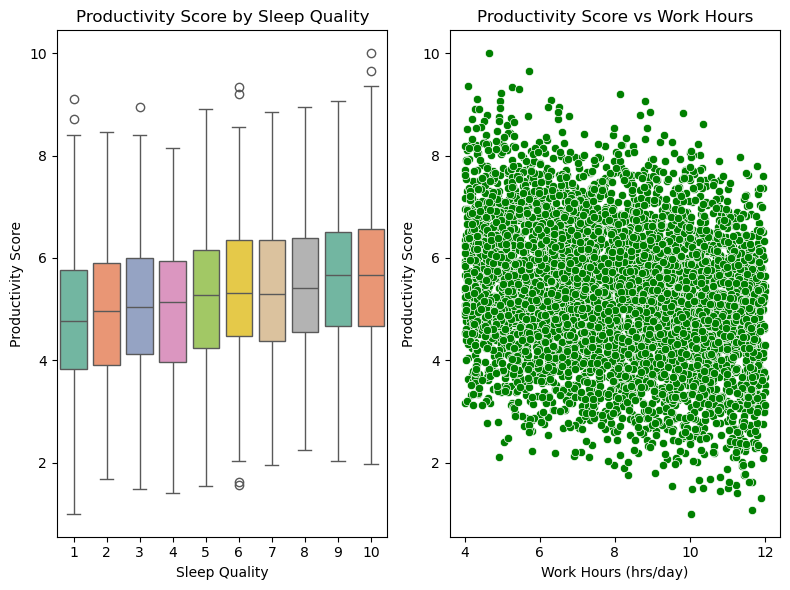

In [28]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Sleep Quality', y='Productivity Score', 
            hue='Sleep Quality', palette='Set2', dodge=False, legend=False)
plt.title('Productivity Score by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Productivity Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Work Hours (hrs/day)', y='Productivity Score', color='green')
plt.title('Productivity Score vs Work Hours')
plt.xlabel('Work Hours (hrs/day)')
plt.ylabel('Productivity Score')

plt.tight_layout()
plt.show()

<h1 style="font-size:25px; color:seagreen">Model Building #2

In [29]:
X = df.drop(columns=['Productivity Score' , 'Mood Score' , 'Stress Level'])
y = df[['Productivity Score','Mood Score' , 'Stress Level']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test.shape)

(1000, 8)


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print(y_pred_lr.shape)

from sklearn.metrics import r2_score
print("R2 scores with Linear Regression:")
for i, col in enumerate(y_test.columns):
    print(f"{col}: {r2_score(y_test[col], y_pred_lr[:, i]):.3f}")


(1000, 3)
R2 scores with Linear Regression:
Productivity Score: 0.803


ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets

In [ ]:
y_pred_df = pd.DataFrame(y_pred_lr, columns=y_test.columns)

# Display first 10 rows of actual vs predicted
print("First 10 Actual Values (y_test):")
print(y_test.reset_index(drop=True).head(10))

print("\nFirst 10 Predicted Values (y_pred_lr):")
print(y_pred_df.head(10))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


ridge_model = MultiOutputRegressor(Ridge(alpha=1.0, random_state=42))
ridge_model.fit(X_train_scaled, y_train)

# 3. Evaluate
y_pred = ridge_model.predict(X_test_scaled)


In [ ]:
for i, col in enumerate(y_test.columns):
    mae = mean_absolute_error(y_test[col], y_pred[:, i])
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"Evaluation for {col} with Ridge (scaled):")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R²:  {r2:.3f}\n")

<h1 style="font-size:24px; color:#dc143c">Dump Pickle File

In [ ]:
with open("IOMP_model.pkl", "wb") as f:
    pickle.dump(model_lr , f)